<a href="https://colab.research.google.com/github/saumyasingh98/HS-Code-Classifier/blob/main/Copy_of_HS_Code_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/datasets/harmonized-system/master/data/harmonized-system.csv")

In [ ]:
df

,section,hscode,description,parent,level
0,I,01,Animals; live,TOTAL,2.0
1,I,0101,"Horses, asses, mules and hinnies; live",01,4.0
2,I,010121,"Horses; live, pure-bred breeding animals",0101,6.0
3,I,010129,"Horses; live, other than pure-bred breeding an...",0101,6.0
4,I,010130,Asses; live,0101,6.0
...,...,...,...,...,...
6705,TOTAL,99,Commodities not specified according to kind,TOTAL,2.0
6706,TOTAL,9999,Commodities not specified according to kind,99,4.0
6707,TOTAL,999999,Commodities not specified according to kind,9999,6.0
6708,TOTAL,TOTAL,All Commodities,TOTAL,5.0


In [ ]:
df=df[df['section']!='TOTAL']

In [ ]:
df

,section,hscode,description,parent,level
0,I,01,Animals; live,TOTAL,2.0
1,I,0101,"Horses, asses, mules and hinnies; live",01,4.0
2,I,010121,"Horses; live, pure-bred breeding animals",0101,6.0
3,I,010129,"Horses; live, other than pure-bred breeding an...",0101,6.0
4,I,010130,Asses; live,0101,6.0
...,...,...,...,...,...
6701,XXI,9705,Collections and collectors' pieces; of zoologi...,97,4.0
6702,XXI,970500,Collections and collectors' pieces; of zoologi...,9705,6.0
6703,XXI,9706,Antiques; of an age exceeding one hundred years,97,4.0
6704,XXI,970600,Antiques; of an age exceeding one hundred years,9706,6.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6706 entries, 0 to 6709
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   section      6705 non-null   object 
 1   hscode       6705 non-null   object 
 2   description  6705 non-null   object 
 3   parent       6705 non-null   object 
 4   level        6705 non-null   float64
dtypes: float64(1), object(4)
memory usage: 314.3+ KB


In [ ]:
df.head(5)

,section,hscode,description,parent,level
0,I,01,Animals; live,TOTAL,2.0
1,I,0101,"Horses, asses, mules and hinnies; live",01,4.0
2,I,010121,"Horses; live, pure-bred breeding animals",0101,6.0
3,I,010129,"Horses; live, other than pure-bred breeding an...",0101,6.0
4,I,010130,Asses; live,0101,6.0


In [ ]:
df=df[df['parent']!='TOTAL']

In [ ]:
df

,section,hscode,description,parent,level
1,I,0101,"Horses, asses, mules and hinnies; live",01,4.0
2,I,010121,"Horses; live, pure-bred breeding animals",0101,6.0
3,I,010129,"Horses; live, other than pure-bred breeding an...",0101,6.0
4,I,010130,Asses; live,0101,6.0
5,I,010190,Mules and hinnies; live,0101,6.0
...,...,...,...,...,...
6701,XXI,9705,Collections and collectors' pieces; of zoologi...,97,4.0
6702,XXI,970500,Collections and collectors' pieces; of zoologi...,9705,6.0
6703,XXI,9706,Antiques; of an age exceeding one hundred years,97,4.0
6704,XXI,970600,Antiques; of an age exceeding one hundred years,9706,6.0


In [ ]:
df=df.dropna()

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 19.4 MB/s 
     |████████████████████████████████| 6.6 MB 68.1 MB/s 
     |████████████████████████████████| 101 kB 10.9 MB/s 
     |████████████████████████████████| 596 kB 63.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
#Installs needed
!pip install langdetect
!pip install semantic-text-similarity

#Libraries needed
import pandas as pd 
import glob
import json
import re 
import numpy as np
import copy 
import torch 
import matplotlib.pyplot as plt
from langdetect import detect
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
print("Done")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 8.7 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=18c6ff31a10665f7d655e733b00eb876ac9a6574a48365762ba55d87e0fb2247
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 416 kB 38.4 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 158 kB 36.9 MB/s 
     |████████████████████████████████| 132 kB 55.3 MB/s 
     |████████████████████████████████| 1.3 MB 51.8 MB/s 
     |████████████████████████████████| 9.0 MB 18.1 MB/s 
     |████████████████████████████████| 79 kB 6.0 MB/s 
     |████████████████████████████████| 139 kB 

In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=c6f2d38f380c11413b0405bbce3fc65b5eeb78cb269ae7565017e0df0719fcaa
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


#Bert Sentence Transformer

SentenceTransformers is a Python framework for state-of-the-art sentence, text, and image embeddings.BERT produces contextualized word embeddings for all input tokens in our text.The framework is based on PyTorch and Transformers and offers a large collection of pre-trained models tuned for various tasks. Further, it is easy to fine-tune your own models.

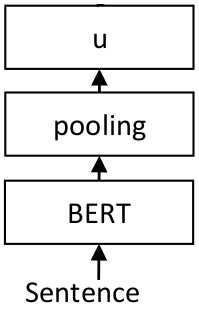

In [ ]:
from sentence_transformers import SentenceTransformer, util

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6609 entries, 0 to 6608
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        6609 non-null   int64  
 1   section      6609 non-null   object 
 2   hscode       6609 non-null   object 
 3   description  6609 non-null   object 
 4   parent       6609 non-null   object 
 5   level        6609 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 309.9+ KB


# Creating Embedding

In [ ]:
embeddings = model.encode(df.description, convert_to_tensor=True)
  

In [ ]:
embeddings = embeddings.cpu()

In [ ]:
embeddings

tensor([[ 0.0176,  0.0110,  0.0479,  ...,  0.0446,  0.0889,  0.0016],
        [-0.0420, -0.0161,  0.0088,  ...,  0.0574,  0.1409,  0.0315],
        [-0.0274, -0.0335, -0.0005,  ...,  0.0423,  0.1526,  0.0514],
        ...,
        [-0.0195,  0.0748, -0.0173,  ..., -0.0271, -0.0804,  0.0452],
        [-0.0722,  0.1590, -0.0082,  ..., -0.0664,  0.0119,  0.0427],
        [-0.0722,  0.1590, -0.0082,  ..., -0.0664,  0.0119,  0.0427]])

# Cosine Similarity


Cosine Similarity is a measurement that quantifies the similarity between two or more vectors.The cosine similarity is described mathematically as the division between the dot product of vectors and the product of the euclidean norms or magnitude of each vector. Here, we are taking one product description and comparing it with every other description and hence obtaining the most similar HS code.

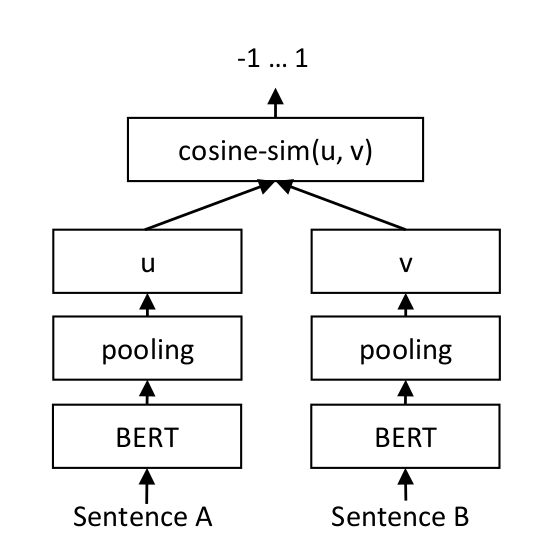

In [ ]:

import time
start=time.time()

from sklearn.metrics.pairwise import cosine_similarity

def most_similar(doc_id,similarity_matrix,matrix):
    print (f'Document: {df.iloc[doc_id]["description"]}')
    print ('\n')
    print ('Similar Documents:')
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    for ix in similar_ix:
        if ix==doc_id:
            continue
        print('\n')
        print(ix)
        print (f'Document: {df.iloc[ix]["description"]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')
    return similar_ix

pairwise_similarities=cosine_similarity(embeddings)

d = most_similar(44,pairwise_similarities,'Cosine Similarity')

print("Time Taken: %s seconds" %(time.time()-start))

Streaming output truncated to the last 5000 lines.

5408
Document: Household or laundry-type washing machines; including machines which both wash and dry
Cosine Similarity : 0.030179738998413086


5671
Document: Electric motors; AC motors, multi-phase, of an output exceeding 750W but not exceeding 75kW
Cosine Similarity : 0.03017481602728367


6120
Document: Aircraft and spacecraft; parts of aeroplanes or helicopters n.e.c. in heading no. 8803
Cosine Similarity : 0.03016751818358898


5743
Document: Lighting or visual signalling equipment (excluding articles of heading no. 8539), windscreen wipers, defrosters and demisters; electrical, of a kind used for cycles or motor vehicles
Cosine Similarity : 0.030109964311122894


6535
Document: Brushes; shaving, hair, nail, eyelash and other toilet brushes for use on the person, including brushes as parts of appliances
Cosine Similarity : 0.030087925493717194


4252
Document: Glasses for corrective spectacles; curved, bent, hollowed or the like

In [ ]:
pairwise_similarities


array([[1.0000004 , 0.6464679 , 0.6441896 , ..., 0.2656111 , 0.08969256,
        0.08969256],
       [0.6464679 , 0.99999964, 0.96570385, ..., 0.26424164, 0.06889879,
        0.06889879],
       [0.6441896 , 0.96570385, 1.0000001 , ..., 0.20519313, 0.01575245,
        0.01575245],
       ...,
       [0.2656111 , 0.26424164, 0.20519313, ..., 1.        , 0.45015743,
        0.45015743],
       [0.08969256, 0.06889879, 0.01575245, ..., 0.45015743, 1.0000001 ,
        1.0000001 ],
       [0.08969256, 0.06889879, 0.01575245, ..., 0.45015743, 1.0000001 ,
        1.0000001 ]], dtype=float32)

In [ ]:
df.description[d]


44                         Meat of bovine animals; frozen
45      Meat; of bovine animals, carcasses and half-ca...
40               Meat of bovine animals; fresh or chilled
47         Meat; of bovine animals, boneless cuts, frozen
46      Meat; of bovine animals, cuts with bone in (ex...
                              ...                        
5681    Electric generating sets; with spark-ignition ...
5684                           Electric rotary converters
2235    Fireworks, signalling flares, rain rockets, fo...
6478    Chandeliers and other electric ceiling or wall...
5677       Electric generating sets and rotary converters
Name: description, Length: 6609, dtype: object

In [ ]:
d

array([  44,   45,   40, ..., 2235, 6478, 5677])

# Top Three Most Similar HS Code

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosi = torch.nn.CosineSimilarity(dim=0)

for i in  (d[1],d[2],d[3],d[4],d[5]):
  print(df.hscode[i]," ",df.description[i]," ",cosi(embeddings[44],embeddings[i]))

020210   Meat; of bovine animals, carcasses and half-carcasses, frozen   tensor(0.8878)
0201   Meat of bovine animals; fresh or chilled   tensor(0.8758)
020230   Meat; of bovine animals, boneless cuts, frozen   tensor(0.8738)
020220   Meat; of bovine animals, cuts with bone in (excluding carcasses and half-carcasses), frozen   tensor(0.8341)
020130   Meat; of bovine animals, boneless cuts, fresh or chilled   tensor(0.8104)
